In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
dataset = pd.read_csv('student_scores.csv')
dataset.shape

(25, 2)

In [28]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


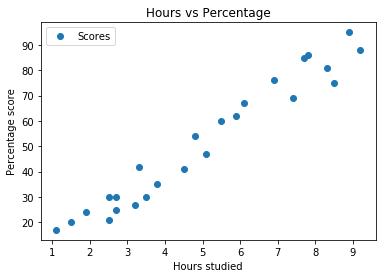

In [36]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

**SET ATTRIBUTES AND LABELS**
* Attributes - Independent variables (X)
* Labels - Dependent variables whose values are to be predicted (y)

In [34]:
X = dataset.iloc[:, :-1].values #[range for rows(all), range for columns(-1 to include all columns except the last one(scores))]
y = dataset.iloc[:, 1].values #[range for rows(all), index of column(1 being the second column)]

**SPLIT DATA INTO TRAIN AND TEST**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#80% training data, 20% testing data

**TRAINING THE ALGORITHM - LINEAR REGRESSION**

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#Retrieve the intercept
print(regressor.intercept_)
#Retrieve the slope
print(regressor.coef_)

2.018160041434683
[9.91065648]


*This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.*

**MAKING PREDICTIONS**

In [46]:
y_pred = regressor.predict(X_test)
#The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

**COMPARING ACTUAL OUTPUT WITH THE PREDICTED VALUES**

In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**EVALUATING THE ALGORITHM**
* Mean Absolute Error (MAE) is the mean of the absolute value of the errors
* Mean Squared Error (MSE) is the mean of the squared errors 
* Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.


In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
